# Q-Q Plots (Quantile-Quantile Plots)
Q-Q plots help you visually assess whether your data follows a particular theoretical distribution (usually normal distribution). If the points fall along a straight diagonal line, your data matches the theoretical distribution.

### What is a Q-Q Plot?
A Q-Q plot compares the quantiles of your data against the quantiles of a theoretical distribution:

- X-axis: Theoretical quantiles (from the distribution you're testing against)
- Y-axis: Sample quantiles (from your actual data)
- Interpretation: Points on a straight line = data matches the distribution

# Comparing Multiple Distributions

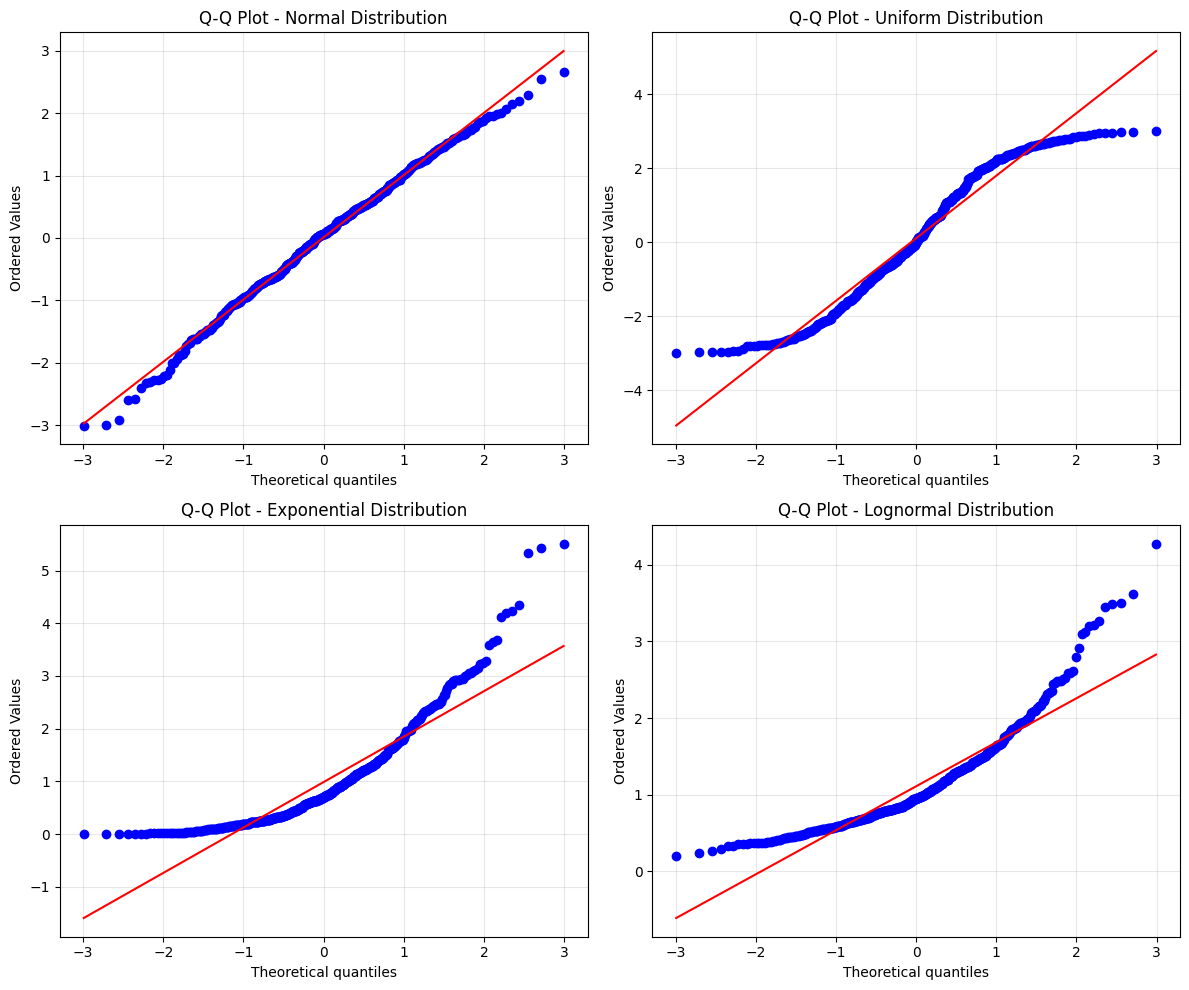

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate different types of data
normal_data = np.random.normal(0, 1, 500)
uniform_data = np.random.uniform(-3, 3, 500)
exponential_data = np.random.exponential(1, 500)
lognormal_data = np.random.lognormal(0, 0.5, 500)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

datasets = [
    (normal_data, 'Normal Distribution'),
    (uniform_data, 'Uniform Distribution'),
    (exponential_data, 'Exponential Distribution'),
    (lognormal_data, 'Lognormal Distribution'),
]

for ax, (data, title) in zip(axes.flat, datasets):
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot - {title}')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Combined Visualization: Histogram + Q-Q Plot

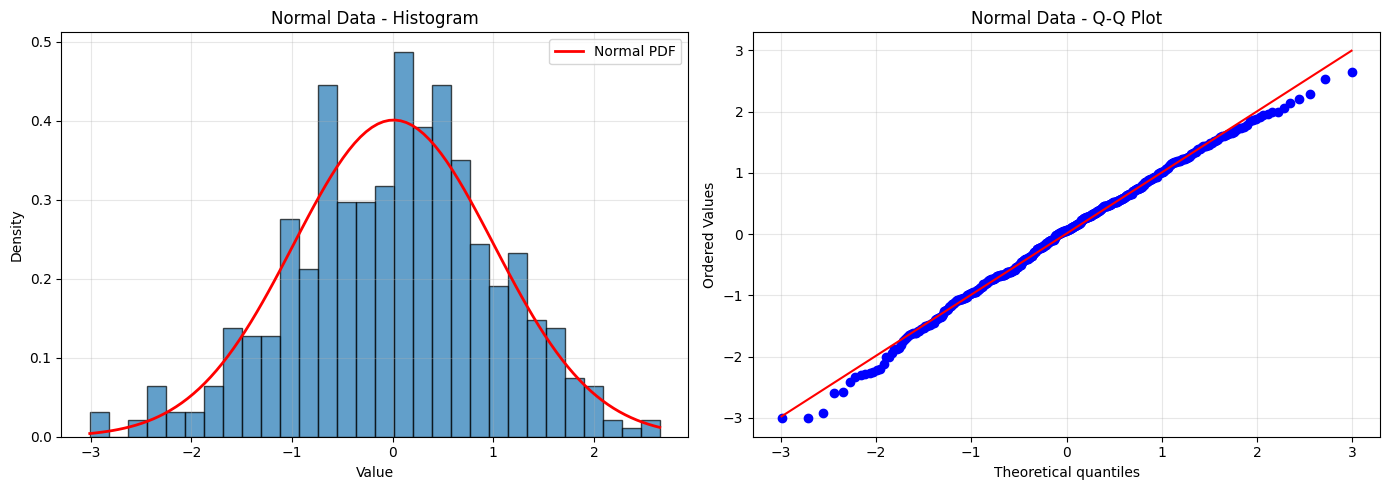

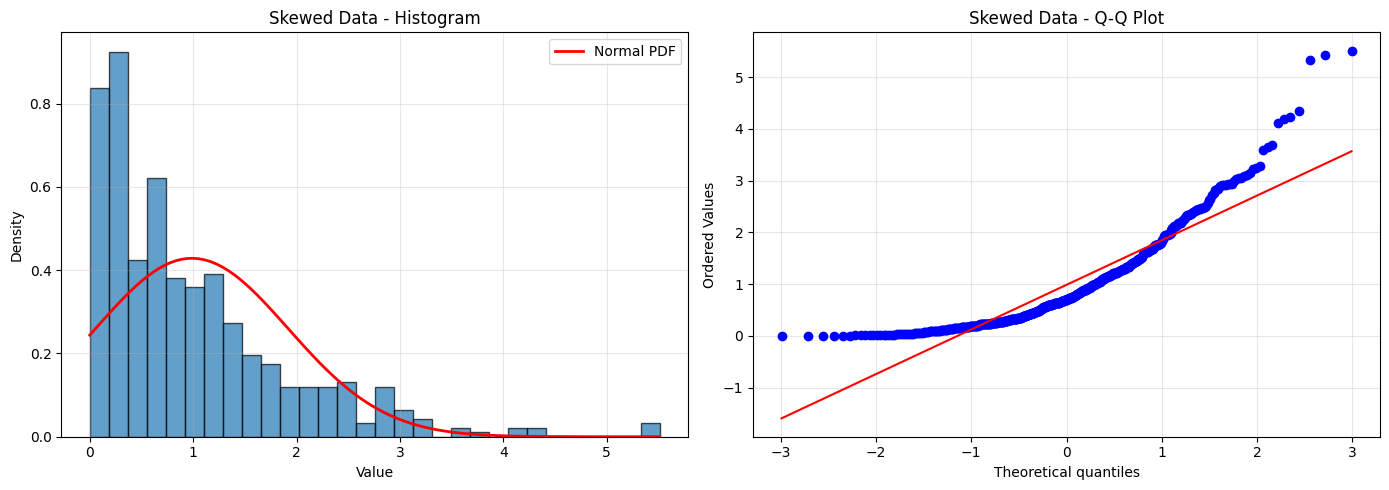

In [4]:
def plot_distribution_check(data, title='Data'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram with normal curve overlay
    ax1.hist(data, bins=30, density=True, alpha=0.7, edgecolor='black')

    # Overlay normal distribution
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal PDF')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    ax1.set_title(f'{title} - Histogram')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'{title} - Q-Q Plot')
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Test with different data
plot_distribution_check(normal_data, 'Normal Data')
plot_distribution_check(exponential_data, 'Skewed Data')